# Montgomery Crime Predictor Visualization 
---

## Target = 'Street name'
### Dataset Source: [dataMontgomery](https://data.montgomerycountymd.gov/Public-Safety/Crime/icn6-v9z3)
---

### Column Description of Original Dataset
ID - Police Incident Number

Offense Code - Offense_Code is the code for an offense committed within the incident as defined by the National Incident-Based Reporting System (NIBRS) of the Criminal Justice Information Services (CJIS) Division Uniform Crime Reporting (UCR) Program.

CR Number - Police Report Number

Dispatch Date/Time - The actual date and time a Officer was dispatched

NIBRS Code - FBI NIBRS codes: National Incident-Based Reporting System (NIBRS) is an incident-based reporting system used by law enforcement agencies in the United States for collecting and reporting data on crimes. Local, state and federal agencies generate NIBRS data from their records management systems.

Victims - Number of Victims

Crime Name1 - Crime against Society/Person/Property or Other

Crime Name2 - Describes the NIBRS_CODE

Crime Name3 - Describes the OFFENSE_CODE

Police District Name - Name of District (Rockville,Weaton etc.)

Block Address - Address in 100 block level

City - City Name

State - State(Maryland)

Zip Code - Zip code

Agency - Assigned Police Department

Place - Place description

Sector - Police sector name, a subset of District

Beat - Police patrol area, a subset of Sector

PRA - Police Response Area, a subset of Beat

Address Number - House or Business Number

Street Prefix - North, South, East, West

Street Name - Name of the Street

Street Suffix - Quadrant (NW, SW, etc)

Street Type - Ave, Drive, Road, etc

Start_Date_Time - Occurred from date/time

End_Date_Time - Occurred to date/time

Latitude - Latitude Coordinate

Longitude - Longitude Coordinate

Police District Number - Major Police Boundary

Location - Location Coordinate

In [1]:
# All imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import pandas_profiling as pp

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.model_selection import cross_val_score

# scipy
import scipy.stats as st
from scipy.stats import uniform, randint

from sklearn import tree
from sklearn.model_selection import cross_val_score

# pipeline
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from category_encoders.ordinal import OrdinalEncoder

# plotly
import plotly.express as px

# date-time
from datetime import datetime

# eli5
import eli5
from eli5.sklearn import PermutationImportance

# pdp
from pdpbox import pdp

In [2]:
# XGB
from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor
import xgboost as xgb

In [3]:
# model loader
import joblib

In [4]:
# Set pandas's max row display
pd.set_option('display.max_row',1000)

# Set pandas's max column width to 50
pd.set_option('display.max_columns',200)

# Set Seaborn style to default
sns.set_style('darkgrid')

In [5]:
pwd

'/Users/yonipineda/lambda_folder/montgomery-crime-project/Montgomery-Project/notebooks'

In [6]:
# load cleaned df
df = pd.read_csv('Cleaned_Crime.csv', index_col=0)

In [7]:
# check df
s = df.shape
print(f"Assert the shape is correct: {s}")
df.head()

Assert the shape is correct: (38046, 27)


Victims              Crime_Type Police District Name  \
99         1                   Other   MONTGOMERY VILLAGE   
102        1   Crime Against Society           GERMANTOWN   
108        1   Crime Against Society              WHEATON   
118        1   Crime Against Society              WHEATON   
124        1  Crime Against Property              WHEATON   

            Block Address           City State  Zip Code Agency  \
99   700 BLK  RUSSELL AVE   GAITHERSBURG    MD   20877.0   MCPD   
102   Other Block Address     GERMANTOWN    MD   20874.0   MCPD   
108   Other Block Address  SILVER SPRING    MD   20902.0   MCPD   
118   Other Block Address  SILVER SPRING    MD   20902.0   MCPD   
124   Other Block Address  SILVER SPRING    MD   20902.0   MCPD   

                        Place Sector Beat    PRA  Address Number  \
99   Parking Lot - Commercial      R  6R1  548.0           700.0   
102  Parking Lot - Commercial      M  5M1  470.0         19700.0   
108               Other Place      L  4L1  366.0         23600.0   
118               Other Place      L  4L1  536.0         12300.0   
124               Other Place      L  4L1  360.0          1100.0   

    Street Prefix Street Name Street Suffix Street Type   Latitude  Longitude  \
99              W     RUSSELL             E         AVE  39.150670 -77.204063   
102             W   FREDERICK             E          RD  39.178539 -77.238524   
108             W     GEORGIA             E         AVE  39.055842 -77.049960   
118             W     GEORGIA             E         AVE  39.058066 -77.050032   
124             W  UNIVERSITY             W         BLV  39.035857 -77.026918   

    Police District Number  Second  Minute  Hour  Week  Day  Month  Year  
99                      6D       0      42    10    43   27     10  2019  
102                     5D       0      44    21    26    1      7  2016  
108                     4D       0      15     2     2    8      1  2020  
118                     4D       0      27    20    26    1      7  2016  
124                     4D       0      33    14    42   19     10  2019

# Making Some Visuals 🎯

### Seaborn Plots

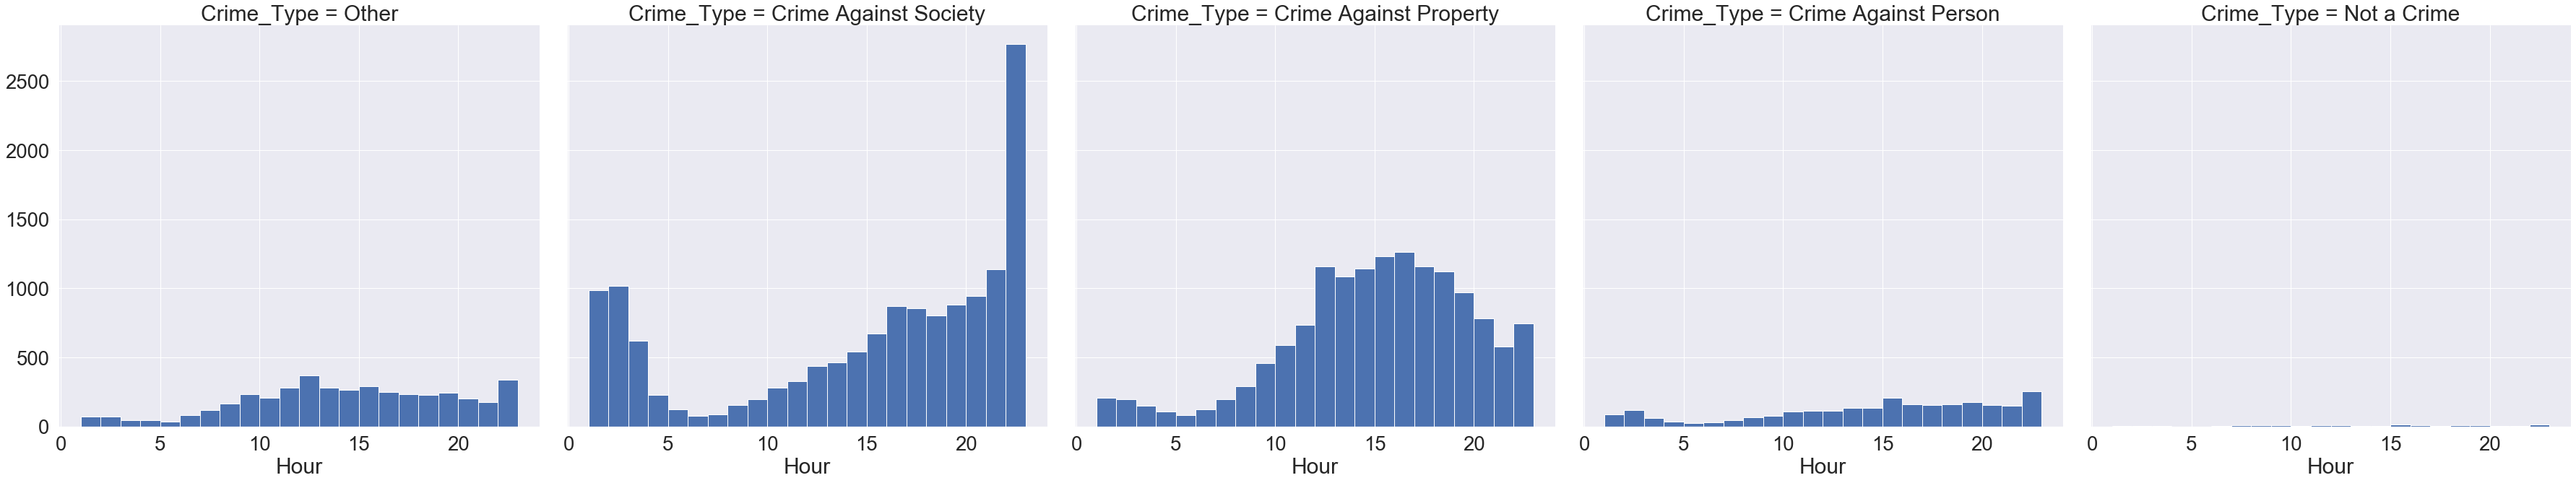

In [8]:
# Set up some seaborn parameters
sns.set(font_scale=2.5)

# There is more crime against property occuring 
# High crime rate at night
sns.set(font_scale=2.5)
g = sns.FacetGrid(df, col="Crime_Type", col_wrap=6, height=10)
g = g.map(plt.hist, "Hour", bins=np.arange(1, 24))

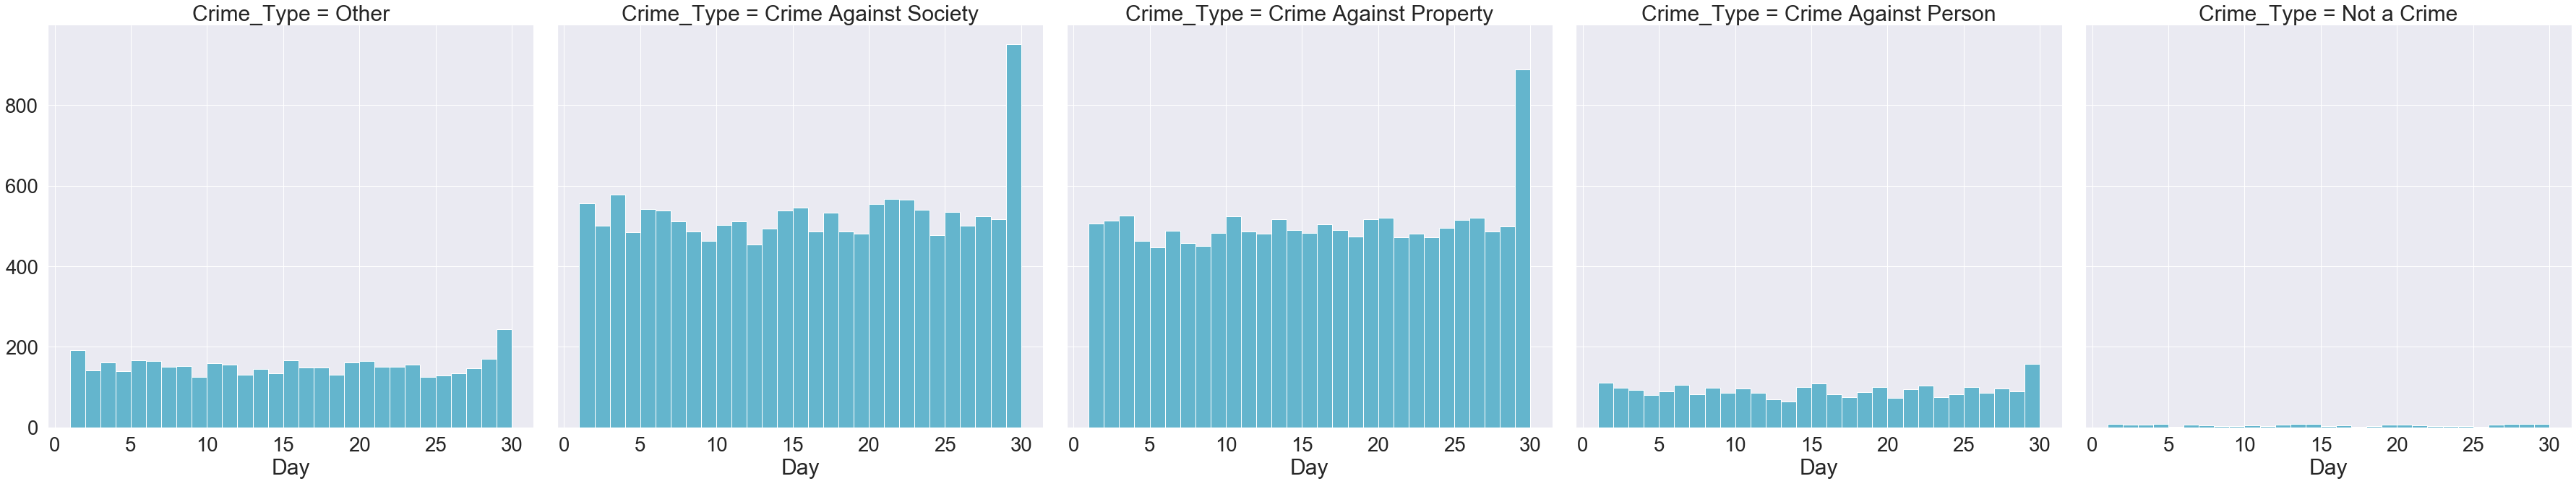

In [9]:
# Day is organized by actual day of the month, not categorical(monday..,friday..etc)
# Crime throughout the days of the month stay constant with the exception of the first and last couple of days
sns.set(font_scale=2.5)
g = sns.FacetGrid(df, col="Crime_Type", col_wrap=6, height=10)
g = g.map(plt.hist, "Day", bins=np.arange(1,31), color='c')

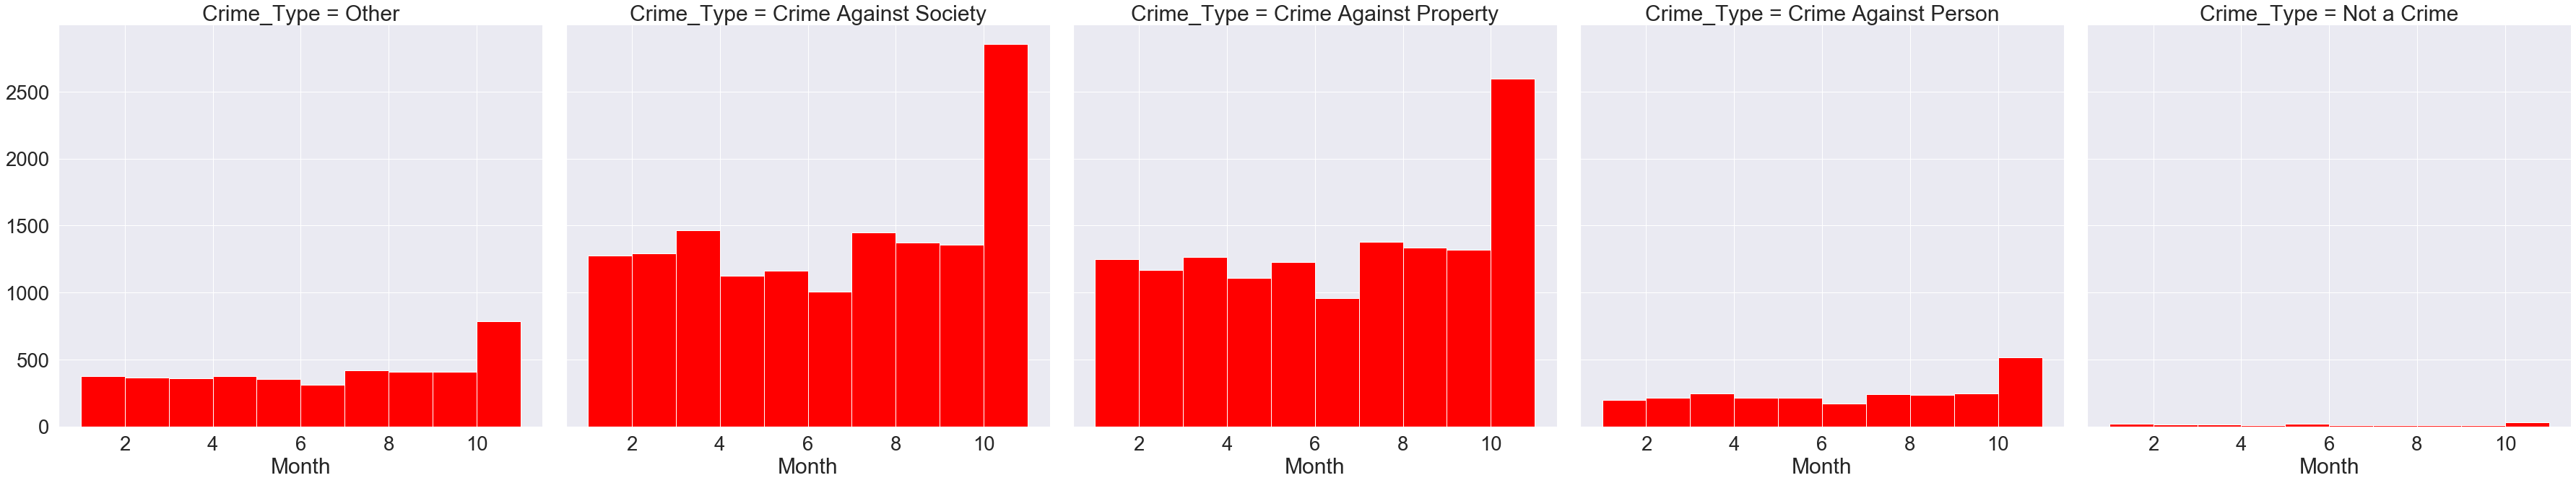

In [10]:
# Crime is relatively similar throughout the months with the exception of October -- towards the end of the year
sns.set(font_scale=2.5)
g = sns.FacetGrid(df, col="Crime_Type", col_wrap=6, height=10)
g = g.map(plt.hist, "Month", bins=np.arange(1,12), color='red')

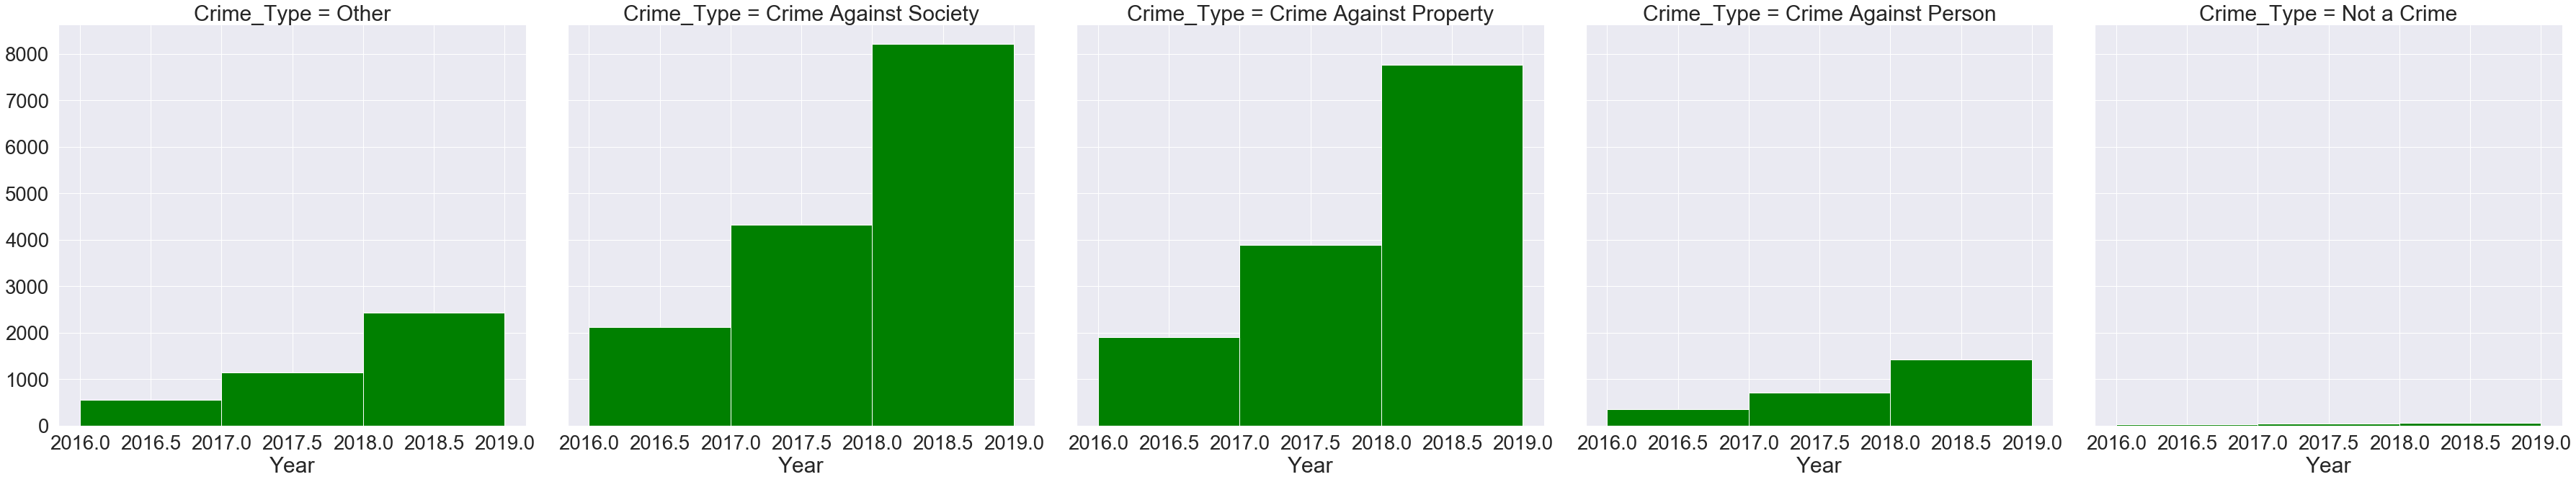

In [11]:
# I described how the data begins in july 1, 2016 and 2020 has just begun -- its why > 2016 is lower than the rest
# also, 2020 does not show up due to not having much data
sns.set(font_scale=2.5)
g = sns.FacetGrid(df, col="Crime_Type", col_wrap=6, height=10)
g = g.map(plt.hist, "Year", bins=np.arange(2016,2020), color='green')

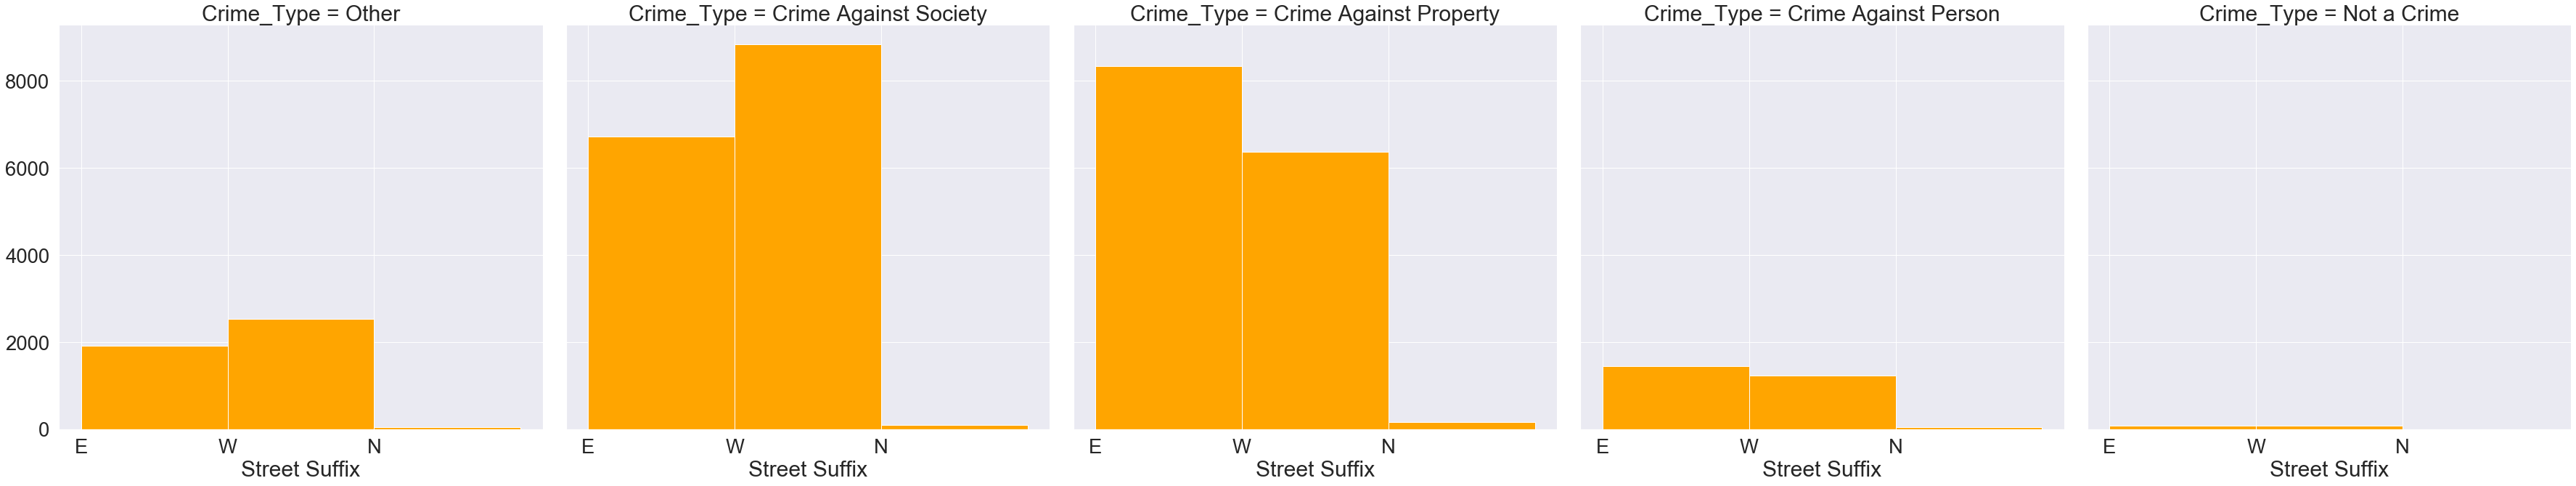

In [12]:
# Most crimes occur in the west/east side of Montgomery County
sns.set(font_scale=2.5)
g = sns.FacetGrid(df, col="Crime_Type", col_wrap=5, height=10)
g = g.map(plt.hist, "Street Suffix", bins=np.arange(0,4), color='orange')

## Line Graphs For plotting Crime frequency by Time 

#### By The Hour

In [13]:
from datetime import datetime


# Let's define a function to plot the distributions of categories of crime based on different temporal features

def plot_temporal_feature(df, time_feature, crime_category_names, xaxis_formatter=None, xtick_inc=None):
    
    # Set figure size
    fig = plt.figure(figsize=(50, 100))
    
    for i in range(len(crime_category_names)):
        p = plt.subplot(10, 4, i+1)
        crime = crime_category_names[i]
        cur_crime_data = df[df['Crime_Type'] == crime]
        temporal_data = cur_crime_data[time_feature].value_counts().sort_index()
        sns.lineplot(data=temporal_data)
        if xtick_inc:
            plt.xticks(np.arange(df[time_feature].unique().min(),df[time_feature].unique().max()+1, xtick_inc))
        plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
        if xaxis_formatter:
            p.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: xaxis_formatter(x)))
    #     p.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
        plt.ylabel("Frequency of Crime", fontsize=25)
        time_feature_str = str(time_feature).capitalize()
        plt.xlabel(time_feature_str, fontsize=25)
        plt.title("%s (%s)" % (crime, 'per '+ time_feature_str), fontsize=30)
    
    fig.savefig('visualizations/%s.png' % time_feature_str, bbox_inches='tight')

In [14]:
# function for hours
def convert_time(hour):
    h = datetime.strptime(str(hour), "%H")
    return h.strftime("%I:%M %p")

In [15]:
## Group dataset by crime occurences and time
crime_per_time = df["Hour"].value_counts().sort_index()
crime_per_time

0     2223
1     1363
2     1407
3      875
4      422
5      263
6      316
7      463
8      689
9      977
10    1188
11    1468
12    2084
13    1968
14    2084
15    2421
16    2554
17    2415
18    2324
19    2279
20    2090
21    2049
22    2039
23    2085
Name: Hour, dtype: int64

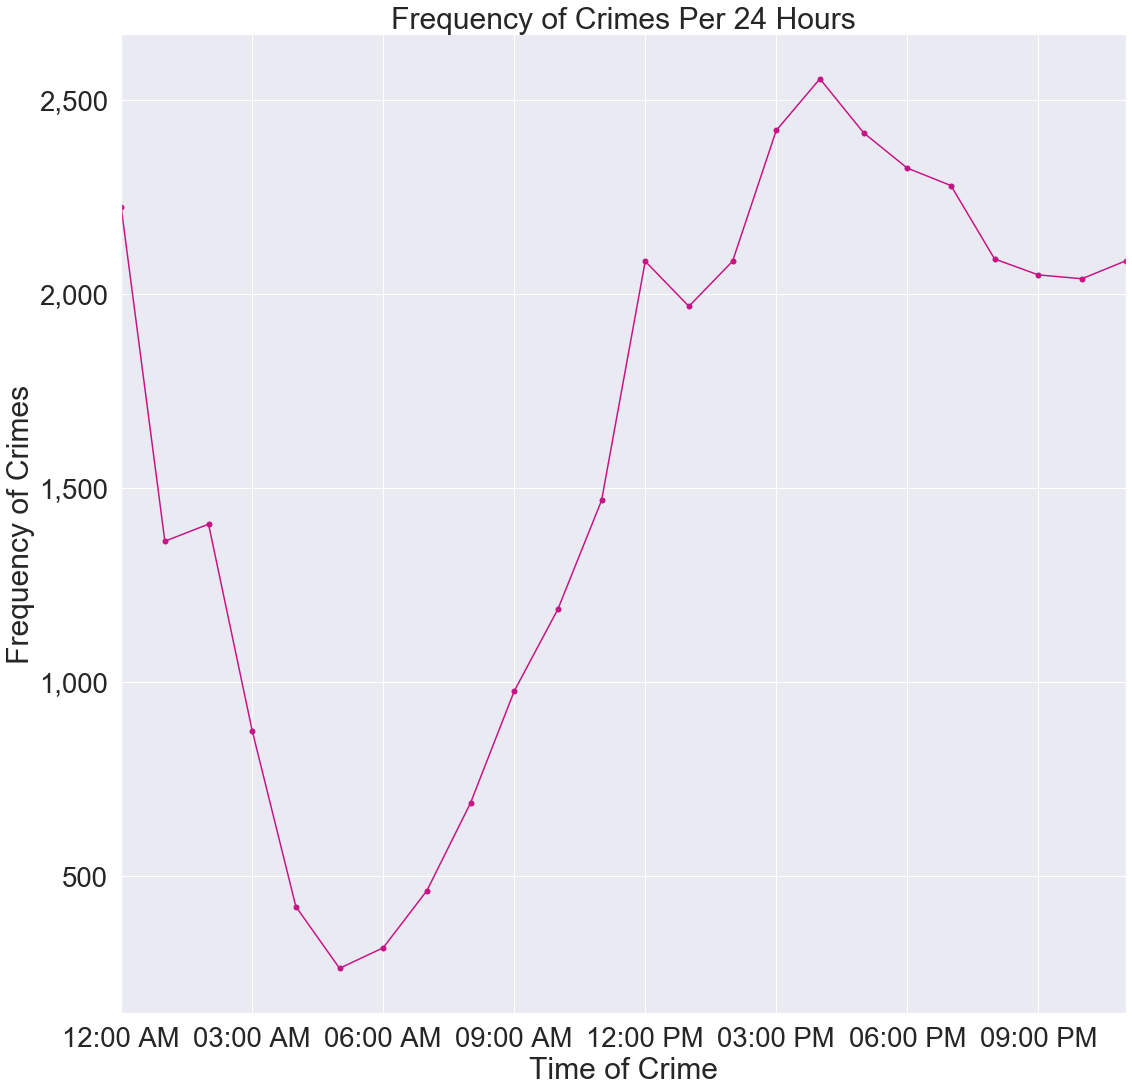

In [16]:
# Plot all crimes over the 24 hours
# Crime is highest at night
fig=plt.figure(figsize=(18, 18))

plt.title("Frequency of Crimes Per 24 Hours")
plt.xlabel("Time of Crime")
plt.ylabel("Frequency of Crimes")

ax = crime_per_time.plot(grid=True, marker='o', color='mediumvioletred')

ax.set_xticks(crime_per_time.index[::3])

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: convert_time(x)))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#### By The Month

In [18]:
# function for month
def convert_month(month):
    month = datetime.strptime(str(month), "%M")
    return month.strftime("%M")

In [19]:
crime_per_month = df['Month'].value_counts().sort_index()
crime_per_month

1     3117
2     3054
3     3358
4     2835
5     2980
6     2462
7     3499
8     3364
9     3339
10    3446
11    3337
12    3255
Name: Month, dtype: int64

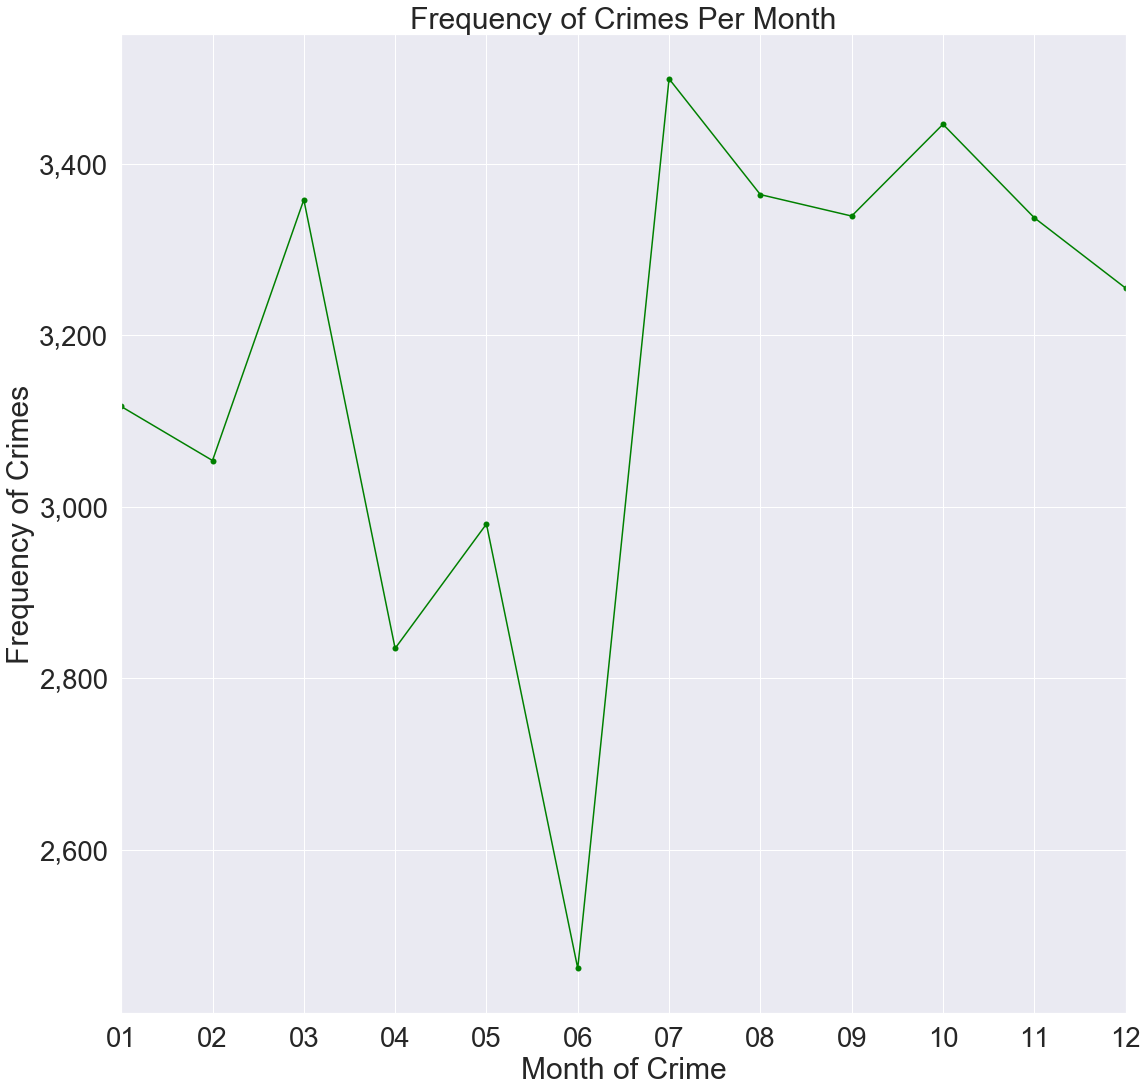

In [20]:
# Plot all crimes over the 12 months
# July to October has high rate of crime frequency
fig=plt.figure(figsize=(18, 18))

plt.title("Frequency of Crimes Per Month")
plt.xlabel("Month of Crime")
plt.ylabel("Frequency of Crimes")

ax = crime_per_month.plot(grid=True, marker='o', color='green')

ax.set_xticks(crime_per_month.index[::1])

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: convert_month(x)))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

## Some Crosstabs

In [34]:
# Relation between Crime Type and City by the Hour
# Returns as a float due to the mean function
# Time is set in Military Time Format!!
city_data = df.groupby(["City", "Crime_Type"])["Hour"].mean().reset_index()
city_data.sort_values(by='Hour')[:10]

City              Crime_Type       Hour
2        BETHESDA   Crime Against Society   9.305699
0        BETHESDA    Crime Against Person   9.777778
7    GAITHERSBURG             Not a Crime  10.166667
21      ROCKVILLE   Crime Against Society  12.128000
14   Other Cities    Crime Against Person  12.422222
17   Other Cities             Not a Crime  12.444444
3        BETHESDA                   Other  12.512821
28  SILVER SPRING                   Other  12.809317
15   Other Cities  Crime Against Property  12.872651
8    GAITHERSBURG                   Other  13.055046

In [33]:
# Relation between Crime Type and City by the Minute
city_data = df.groupby(["City", "Crime_Type"])["Minute"].mean().reset_index()
city_data.sort_values(by='Minute')[:10]

City              Crime_Type     Minute
12     GERMANTOWN             Not a Crime  14.714286
22      ROCKVILLE             Not a Crime  15.235294
3        BETHESDA                   Other  19.307692
23      ROCKVILLE                   Other  20.467012
20      ROCKVILLE  Crime Against Property  21.054589
8    GAITHERSBURG                   Other  21.244037
17   Other Cities             Not a Crime  21.333333
15   Other Cities  Crime Against Property  21.553932
1        BETHESDA  Crime Against Property  21.828571
28  SILVER SPRING                   Other  22.247533

In [32]:
# Relation between Crime Type and City by the Month
city_data = df.groupby(["City", "Crime_Type"])["Month"].mean().reset_index()
city_data.sort_values(by='Month')[:10]

City              Crime_Type     Month
0        BETHESDA    Crime Against Person  5.222222
27  SILVER SPRING             Not a Crime  6.041667
13     GERMANTOWN                   Other  6.128205
12     GERMANTOWN             Not a Crime  6.142857
2        BETHESDA   Crime Against Society  6.176166
22      ROCKVILLE             Not a Crime  6.323529
1        BETHESDA  Crime Against Property  6.514286
4    GAITHERSBURG    Crime Against Person  6.535593
21      ROCKVILLE   Crime Against Society  6.545714
16   Other Cities   Crime Against Society  6.559968

In [35]:
# Relation between Crime Type and Street Name by the Hour
city_data = df.groupby(["Street Name", "Crime_Type"])["Hour"].mean().reset_index()
city_data.sort_values(by='Hour')[:10]

Street Name             Crime_Type       Hour
18  NEW HAMPSHIRE            Not a Crime  10.250000
37     UNIVERSITY            Not a Crime  10.769231
27      ROCKVILLE  Crime Against Society  11.375666
8       FREDERICK            Not a Crime  11.600000
24       RANDOLPH                  Other  12.180085
10        GEORGIA   Crime Against Person  12.409027
22       RANDOLPH  Crime Against Society  12.484848
20       RANDOLPH   Crime Against Person  12.585987
19  NEW HAMPSHIRE                  Other  12.682609
34     UNIVERSITY   Crime Against Person  12.689970

## Some Plotly Visuals for The APP !

In [37]:
# Image for app
import plotly.express as px
fig = px.scatter_mapbox(df, lat='Latitude', lon='Longitude', color='Street Name', opacity=0.1)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

In [38]:
# Plotly Scatter Plot 
fig = px.scatter(df, x="Crime_Type", y="Street Name")
fig.show()